# Importing Data And Libraries

In [2]:
#Imported Libraries,
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This command propts matplotlib visuals to appear in the notebook
%matplotlib inline

In [4]:
# Folder shortcut path,
path = r'C:\Users\Home\Desktop\Task 6.1'

In [5]:
path

'C:\\Users\\Home\\Desktop\\Task 6.1'

In [6]:
#Imported Covid dataset.csv,
Covid_data = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'Covid_data.csv'))

In [7]:
#Checked head,
Covid_data.head()

,Unnamed: 0,Country,Continent,Population,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,0,USA,North America,331198130,5032179,162804,2576668,2292707,18296,15194,492.0,63139605,190640
1,1,Brazil,South America,212710692,2917562,98644,2047660,771258,8318,13716,464.0,13206188,62085
2,2,India,Asia,1381344997,2025409,41638,1377384,606387,8944,1466,30.0,22149351,16035
3,3,Russia,Europe,145940924,871894,14606,676357,180931,2300,5974,100.0,29716907,203623
4,4,South Africa,Africa,59381566,538184,9604,387316,141264,539,9063,162.0,3149807,53044


In [8]:
#Checked shape,
Covid_data.shape

(208, 13)

In [9]:
# Dropping unneeded columns and creating data subset
Covid_Data = Covid_data.drop(['Unnamed: 0','Continent'], axis = 1)

In [10]:
Covid_Data.columns

Index(['Country', 'Population', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Critical Cases', 'Tot Cases/1M pop',
       'Deaths/1M pop', 'Total Tests', 'Tests/1M pop'],
      dtype='object')

In [11]:
#Checked for duplicates,
Covid_Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
203    False
204    False
205    False
206    False
207    False
Length: 208, dtype: bool

No Duplicates

In [12]:
#Checked for missing values,
Covid_Data.isnull().sum()

Country             0
Population          0
Total Cases         0
Total Deaths        0
Total Recovered     0
Active Cases        0
Critical Cases      0
Tot Cases/1M pop    0
Deaths/1M pop       0
Total Tests         0
Tests/1M pop        0
dtype: int64

# Checking For Extreme Values

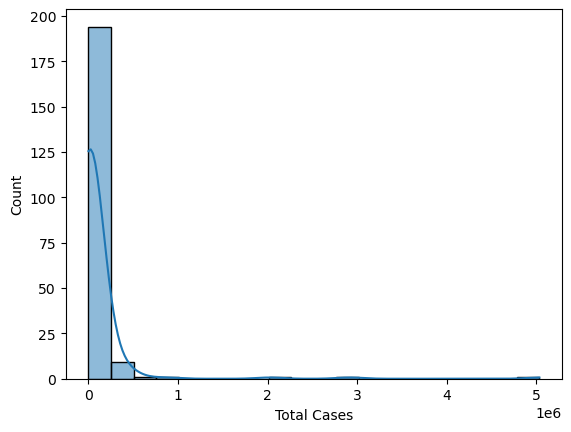

In [13]:
#Created a histogram for extreme values for Total Cases,
hist_cases = sns.histplot(Covid_Data['Total Cases'], bins = 20, kde = True)

In [14]:
#exporting the visual
hist_cases.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'Totalcases_Histogram.png'))

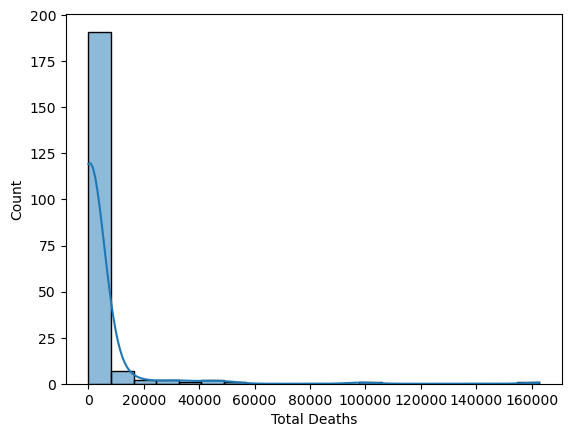

In [15]:
#Created a histogram for extreme values for Total Death,
hist_tot_deaths = sns.histplot(Covid_Data['Total Deaths'], bins = 20, kde = True)

In [16]:
#exporting the visual
hist_tot_deaths.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'Totaldeaths_Histogram.png'))

# Exploring Relationships

C:\Users\Home\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


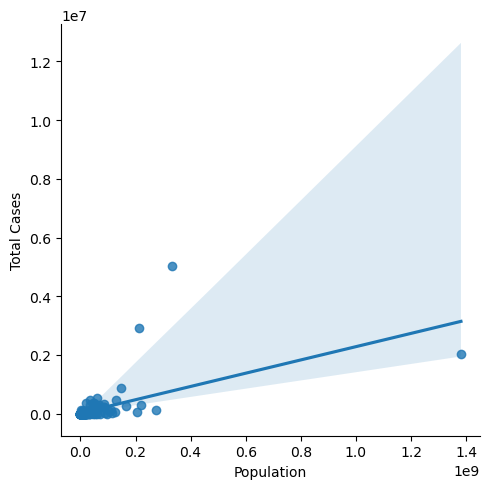

In [17]:
#Created scatterplot for population and total cases,
scatter_us_op = sns.lmplot(data=Covid_Data, x="Population", y="Total Cases")

In [18]:
#exporting the visual
scatter_us_op.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'Population_Totalcases_Scatterplot.png'))

C:\Users\Home\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


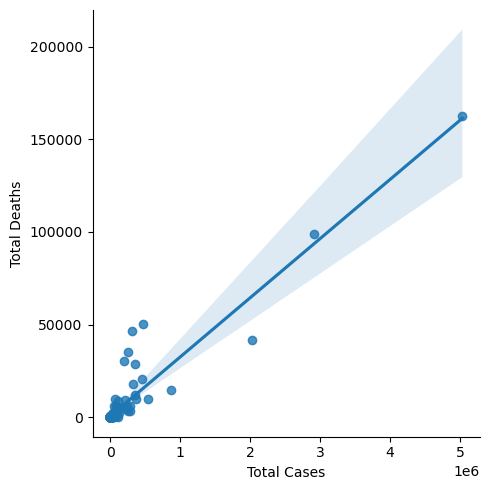

In [19]:
#Created scatterplot for total cases and total death,
scatter_us_op = sns.lmplot(data=Covid_Data, x="Total Cases", y="Total Deaths")

In [20]:
#exporting the visual
scatter_us_op.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'Totaldeaths_Totalcases_Scatterplot.png'))

# Hypotheses

In [ ]:
Country with high population, has high chance of total covid cases and total deaths

# Reshaping The Variables into NumPy arrays

# Testing Population and Total Cases

In [21]:
# Reshaped the variables into NumPy arrays and put them into separate objects,
X = Covid_Data['Population'].values.reshape(-1,1)
y = Covid_Data['Total Cases'].values.reshape(-1,1)

In [22]:
X

array([[ 331198130],
       [ 212710692],
       [1381344997],
       [ 145940924],
       [  59381566],
       [ 129066160],
       [  33016319],
       [  19132514],
       [  50936262],
       [  46756648],
       [  84097623],
       [  67922029],
       [  34865919],
       [ 221295851],
       [ 164851401],
       [  60452568],
       [  84428331],
       [  45236884],
       [  83811260],
       [  65288306],
       [  40306025],
       [ 109722719],
       [ 273808365],
       [  37775022],
       [   2807805],
       [  18798667],
       [ 102516525],
       [  17668824],
       [  11688459],
       [  10105596],
       [   5118446],
       [   9197590],
       [  43705858],
       [  10858648],
       [   4321282],
       [  11594739],
       [   4276658],
       [   9449001],
       [   9902079],
       [  19224023],
       [  17138756],
       [   5854932],
       [  17946899],
       [  10193593],
       [  37842302],
       [ 206606300],
       [   9919704],
       [   17

In [23]:
y

array([[5032179],
       [2917562],
       [2025409],
       [ 871894],
       [ 538184],
       [ 462690],
       [ 455409],
       [ 366671],
       [ 357710],
       [ 354530],
       [ 320117],
       [ 308134],
       [ 284226],
       [ 281863],
       [ 249651],
       [ 249204],
       [ 237265],
       [ 228195],
       [ 215210],
       [ 195633],
       [ 140603],
       [ 119460],
       [ 118753],
       [ 118561],
       [ 112092],
       [  95942],
       [  95006],
       [  90537],
       [  86423],
       [  81967],
       [  80713],
       [  79559],
       [  76808],
       [  76536],
       [  71418],
       [  71158],
       [  70045],
       [  68503],
       [  61845],
       [  57895],
       [  56982],
       [  54555],
       [  54339],
       [  52061],
       [  49515],
       [  45244],
       [  45098],
       [  42889],
       [  42263],
       [  39819],
       [  39642],
       [  38659],
       [  36896],
       [  36108],
       [  33626],
       [  

In [24]:
# Split data into a training set and a test set,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [25]:
# Created a regression object,
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set,
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predicted the values of y using X,
y_predicted = regression.predict(X_test)

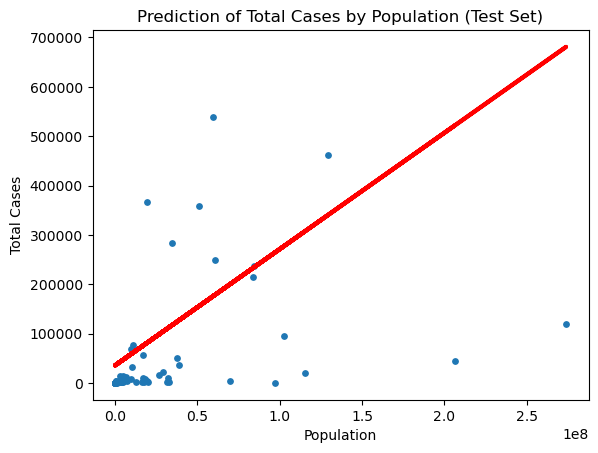

In [28]:
# Created a plot that shows the regression line from the model on the test set,
plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted,color='red', linewidth =3)
plot_test.title('Prediction of Total Cases by Population (Test Set)')
plot_test.xlabel('Population')
plot_test.ylabel('Total Cases')
plot_test.show()

In [29]:
#exporting the visual
plot_test.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'Population_Totalcases_Scatterplot.png'))

AttributeError: 'function' object has no attribute 'savefig'

In [33]:
# Created objects that contain the model summary statistics,
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [34]:
# Printed the model summary statistics. This is where you evaluate the performance of the model,
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00235722]]
Mean squared error:  19283558315.10242
R2 score:  -0.40508289326860014


In [35]:
# Created a dataframe comparing the actual and predicted values of y,
Covid_Data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
Covid_Data.head(30)

,Actual,Predicted
0,284226,117637.545380
1,10715,75014.129004
2,76536,61047.039292
3,462690,339688.577828
4,89,35540.679972
5,9038,111839.843114
6,2734,36762.763696
7,2171,41857.996825
8,7164,78894.713092
9,747,265104.396224


In [36]:
# Predicted
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train),
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00235722]]
Mean squared error:  (180415760882.03088,)
R2 score:  0.3102652368297586


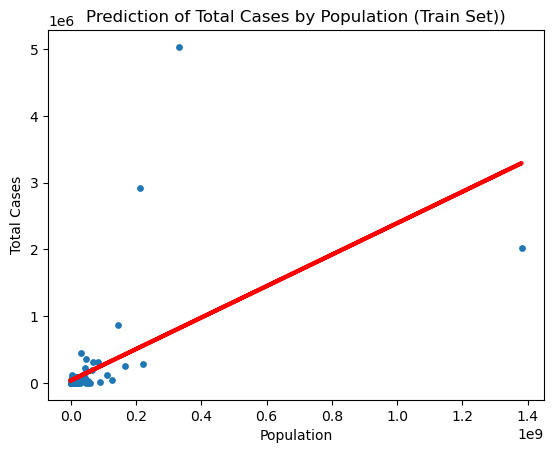

In [39]:
# Visualized the training set results,
plot_test = plt
plot_test.scatter(X_train, y_train, s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Prediction of Total Cases by Population (Train Set))')
plot_test.xlabel('Population')
plot_test.ylabel('Total Cases')
plot_test.show()

### Conclusions
Based on this information it can be seen that the Test Set and the Training Set both had the similar R2 indicating a negative and weak relationship between population and total cases. The mean squared error is quite large in both the Training Set and the Test Set it would be better if this was lower. The slope value in both the Training Set and the Test Set were also weak showing no significant amount of this variance is explained by the population. Overall, the regression model did not perform that well seen with the actual and predicted values were significantly off and the MSE was very high.

# Testing Total Cases and Total Deaths

In [45]:
# Reshaped the variables into NumPy arrays and put them into separate objects,
X = Covid_data['Total Cases'].values.reshape(-1,1)
y = Covid_data['Total Deaths'].values.reshape(-1,1)

In [46]:
X

array([[5032179],
       [2917562],
       [2025409],
       [ 871894],
       [ 538184],
       [ 462690],
       [ 455409],
       [ 366671],
       [ 357710],
       [ 354530],
       [ 320117],
       [ 308134],
       [ 284226],
       [ 281863],
       [ 249651],
       [ 249204],
       [ 237265],
       [ 228195],
       [ 215210],
       [ 195633],
       [ 140603],
       [ 119460],
       [ 118753],
       [ 118561],
       [ 112092],
       [  95942],
       [  95006],
       [  90537],
       [  86423],
       [  81967],
       [  80713],
       [  79559],
       [  76808],
       [  76536],
       [  71418],
       [  71158],
       [  70045],
       [  68503],
       [  61845],
       [  57895],
       [  56982],
       [  54555],
       [  54339],
       [  52061],
       [  49515],
       [  45244],
       [  45098],
       [  42889],
       [  42263],
       [  39819],
       [  39642],
       [  38659],
       [  36896],
       [  36108],
       [  33626],
       [  

In [47]:
y

array([[162804],
       [ 98644],
       [ 41638],
       [ 14606],
       [  9604],
       [ 50517],
       [ 20424],
       [  9889],
       [ 11939],
       [ 28500],
       [ 17976],
       [ 46413],
       [  3055],
       [  6035],
       [  3306],
       [ 35187],
       [  5798],
       [  4251],
       [  9252],
       [ 30312],
       [  5161],
       [  2150],
       [  5521],
       [  8966],
       [   178],
       [  1058],
       [  4951],
       [  5877],
       [  3465],
       [  5766],
       [   492],
       [   576],
       [  1819],
       [  1246],
       [  1574],
       [  9859],
       [   469],
       [   580],
       [   354],
       [  2566],
       [  6153],
       [    27],
       [  2119],
       [  1743],
       [  1774],
       [   930],
       [  1423],
       [   156],
       [  1026],
       [   772],
       [   199],
       [  1447],
       [  1298],
       [  1985],
       [  1273],
       [   479],
       [   449],
       [   175],
       [   621

In [48]:
# Split data into a training set and a test set,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
# Created a regression object,
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [50]:
# Fit the regression object onto the training set,
regression.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predicted the values of y using X,
y_predicted = regression.predict(X_test)

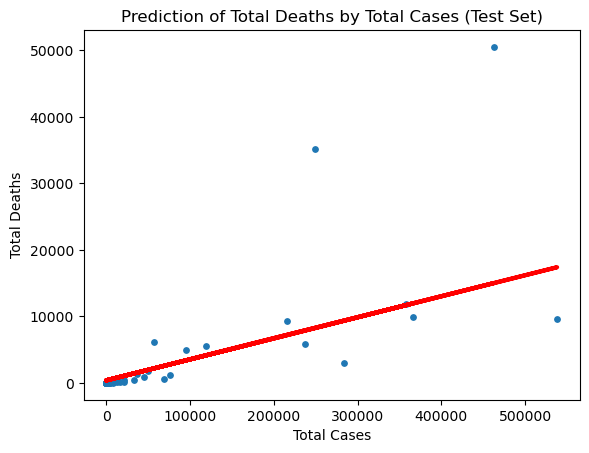

In [53]:
#Created a plot that shows the regression line from the model on the test set,
plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted,color='red', linewidth =3)
plot_test.title('Prediction of Total Deaths by Total Cases (Test Set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Total Deaths')
plot_test.show()

In [54]:
# Created objects that contain the model summary statistics,
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error,
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [55]:
# Printed the model summary statistics. This is where you evaluate the performance of the model,
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03160884]]
Mean squared error:  33925905.79583416
R2 score:  0.45719098406383574


In [56]:
# Created a dataframe comparing the actual and predicted values of y,
Covid_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
Covid_data.head(30)

,Actual,Predicted
0,3055,9367.829434
1,223,722.464610
2,1246,2802.989920
3,50517,15008.869056
4,1,386.589100
5,125,669.456589
6,27,470.194475
7,81,452.398700
8,199,610.221627
9,10,407.387715


In [57]:
# Predicted
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [58]:
rmse = mean_squared_error(y_train, y_predicted_train),
r2 = r2_score(y_train, y_predicted_train)

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03160884]]
Mean squared error:  (22161669.63278664,)
R2 score:  0.9218293713863179


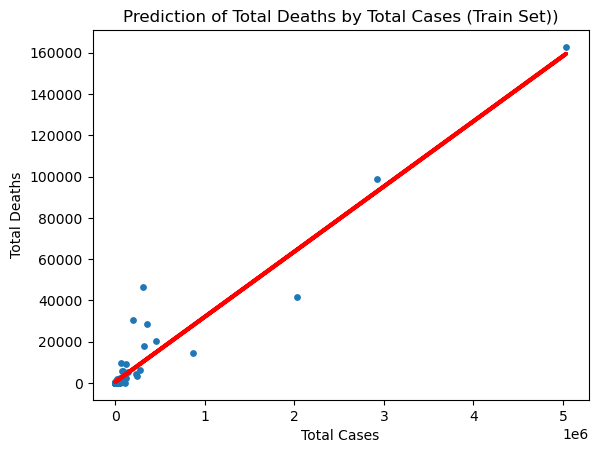

In [60]:
# Visualized the training set results,
plot_test = plt
plot_test.scatter(X_train, y_train, s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Prediction of Total Deaths by Total Cases (Train Set))')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Total Deaths')
plot_test.show()

### Conclusions,
Based on this information it can be seen that the Test Set and the Training Set results for Total Cases and Total Deaths are similar to the results from Population and Totals Cases. Here both had the same slope indicating a weak relationship between population, total Cases and total deaths. However, the R2 is 0.92 in test and 0.45 in training between total cases and total death, is quite large then the R2 between population and total cases. Neverthless, overall the regression model did not perform that well seen with the actual and predicted values were significantly off and the MSE was very high.